In [30]:
# note: fdfdpy and nonlinear_avm must be in PATH
from fdfdpy.Fdfd import Fdfd
from optimization import run_optimization
from optimization_class import Optimization
from structures import three_port

import numpy as np
import matplotlib.pylab as plt
import scipy.sparse as sp

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
lambda0 = 2e-6
c0 = 3e8
omega = 2*np.pi*c0/lambda0  # angular frequency (2pi)
dl = 0.4e-1                   # grid size (L0)
Nx = 200
Ny = 150
nx, ny = int(Nx/2), int(Ny/2)
shape = (Nx,Ny)           # shape of domain (in grids)
NPML = [10, 10]             # number of pml grid points on x and y borders
pol = 'Ez'                  # polarization (either 'Hz' or 'Ez')

In [32]:
# define the two port parameters
L = 3.24
H = 3
w = .2
d = 1.5
# d = int(d/2/dl)*dl*2

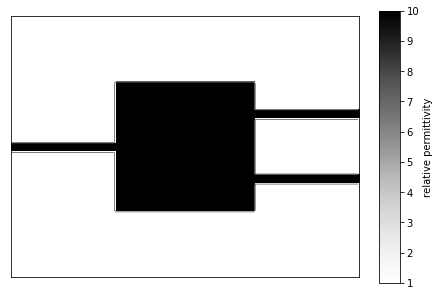

In [33]:
# define permittivity of three port system
eps_r = three_port(L, H, w, d, dl, shape, eps_start=10)
simulation = Fdfd(omega,eps_r,dl,NPML,pol)
simulation.plt_eps()
plt.show()

In [34]:
# set the modal source and probes
simulation.add_mode(3.5, 'x', [15, ny], 100, scale=70)
simulation.setup_modes()
print('input power of {} W/L0'.format(simulation.W_in))


input power of 6.465789497884717 W/L0


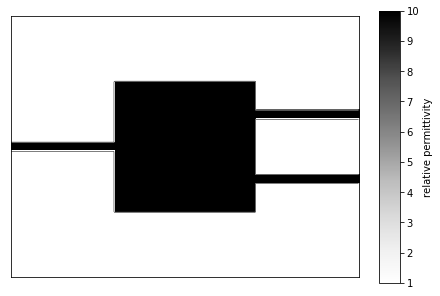

input power of 0.8305782619598873 W/L0


In [35]:
# Define a finer meshing of the same structure
dl = 0.2e-1                   # grid size (L0)
Nx = 400
Ny = 300
nx, ny = int(Nx/2), int(Ny/2)
shape = (Nx,Ny)           # shape of domain (in grids)
# define permittivity of three port system
eps_r = three_port(L, H, w, d, dl, shape, eps_start=10)
simulation = Fdfd(omega,eps_r,dl,NPML,pol)
simulation.plt_eps()
plt.show()
# simulation to solve
simulation = Fdfd(omega, eps_r, dl, NPML, 'Ez')
simulation.add_mode(3.5, 'x', [15, ny], 100, scale=70)
simulation.setup_modes()
print('input power of {} W/L0'.format(simulation.W_in))